In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import pandas as pd
import numpy as np
import demoji
import nltk
import os

In [ ]:
nltk.download("rslp")

In [5]:
from functions.data_cleaning_module import *

### carregamento dos dados

In [6]:
df_negativo = pd.read_csv("../data/raw/coleta-negativo-1.csv",
                          delimiter="\t", on_bad_lines='skip', engine="python")


df_positivo = pd.read_csv("../data/raw/coleta-positivo-1.csv",
                          delimiter="\t", on_bad_lines='skip', engine="python")

In [7]:
 print(f"Tweets positivos:{len(df_positivo)}, tweets negativos: {len(df_negativo)}")

Tweets positivos:50012, tweets negativos: 14844


### remocao de nulls

In [8]:
df_positivo.dropna(inplace=True)
df_negativo.dropna(inplace=True)

## Limpeza dos tweets

### remocao de emojis

In [9]:
df_negativo["tweet"] = df_negativo["tweet"].apply(lambda x: demoji.replace(x, " "))
df_positivo["tweet"] = df_positivo["tweet"].apply(lambda x: demoji.replace(x, " "))

### remocao de menções e links

In [10]:
df_negativo["tweet"] = df_negativo["tweet"].apply(lambda x: limpa_texto(x))
df_positivo["tweet"] = df_positivo["tweet"].apply(lambda x: limpa_texto(x))

### remocao de textos duplicados

In [11]:
df_negativo.drop_duplicates(["tweet"], inplace=True)
df_positivo.drop_duplicates(["tweet"], inplace=True)

### remocao das pontuações

In [12]:
# removendo as pontuações
df_positivo["tweet"] = df_positivo["tweet"].apply(lambda tweet: formatar_texto(texto=tweet))
df_negativo["tweet"] = df_negativo["tweet"].apply(lambda tweet: formatar_texto(texto=tweet))

### Etiquetando os dados

In [13]:
df_positivo["label"] = "positivo"
df_negativo["label"] = "negativo"

### Alterando a referencia de Londres (UTC) para Brasilia (UTC -3h)

In [14]:
df_positivo.date.apply(lambda x: from_utc_to_local_time(x, -3));
df_negativo.date.apply(lambda x: from_utc_to_local_time(x, -3));

### Obtenção do período do dia

In [15]:
df_positivo = df_positivo.assign(day_period = df_positivo.date.apply(
    lambda x: get_period(pd.to_datetime(x).hour)))

df_negativo = df_negativo.assign(day_period = df_negativo.date.apply(
    lambda x: get_period(pd.to_datetime(x).hour)))

In [16]:
df_positivo.head()

,user_name,tweet,date,label,day_period
0,ttdavit0ri4,se a pila me pagar eu vou no outback amanhã,2022-06-10 02:25:24+00:00,positivo,overnight
1,vtcamuzzi,queria ir no outback comer o fondue no dia dos...,2022-06-08 15:31:11+00:00,positivo,afternoon
2,juxtonie,e eu que fui tirar uma foto do novo fondue do ...,2022-06-01 00:31:40+00:00,positivo,overnight
3,gabigduda,quem vai pagar um chopp no happy hour do outba...,2022-05-13 18:29:12+00:00,positivo,night
4,lahhhaffz,"tô entre “comemorar” no outback, coco bambu ou...",2022-05-02 22:16:49+00:00,positivo,night


### Salvando dados

In [17]:
## Salvando os dados no repositorio definitivo
df_positivo.to_csv("../data/processed/tweets-positivos.csv", sep="\t", index=False)
df_negativo.to_csv("../data/processed/tweets-negativos.csv", sep="\t", index=False)

In [18]:
!ls ../

clean-dataset  docs	   models     poetry.lock     README.md   src
data	       mkdocs.yml  notebooks  pyproject.toml  references  tasks.py


In [19]:
# # Salvando os dados no repositorio temporario clean data-set

# df_positivo.to_csv("../clean-dataset/tweets-positivos.csv", sep="\t", index=False)
# df_negativo.to_csv("../clean-dataset/tweets-negativos.csv", sep="\t", index=False)

# 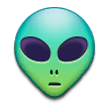 BUSQUEM CONHECIMENTO 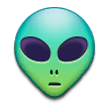